In [7]:
import numpy as np
import scipy as sp
import scipy.signal as sig

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

import matplotlib.cm as cm

import cvxopt

import cvxpy as cvx

%matplotlib notebook

import picos as pic



\includepackage{amsmath}

# Task Allocation Problem 
In this document we consider a distributed task allocation problem in which we attempt to match the available robots to the current tasks such that a global utility measure is optimised. 

-We start by formulating the problem as a centralised offline task matching which we solve using a mixed integer programming (MIP) optimisation toolbox called Gurobi.

-We then move on an online implementation of the offline solution using a rolling horizon strategy in order to account for the unforseen uncertainties in the tasks/robot matching problem.

-Finally, we consider a distributed version of the problem in which robots locally resolve the task allocation problem based on limited local knowledge. 





Consider a simple task assignment problem in which N tasks are to be assigned to N agents. All the tasks must
be assigned, and no agent can perform more than one task, hence every agent must be assigned a task. The tasks are
discrete: they cannot be shared between agents. The cost of assigning agent $i$ to task $j$ is $c_{ij}$ . To solve this problem by optimization, define the decision variable $z_{ij} = 1$ if task $i$ is assigned to agent $j$ and $0$ otherwise. Therefore the problem can be written as 

$\begin{align}
\min_z &\sum_{i=1}^N\sum_{j=1}^N c_{ij}z_{ij}\\
\quad  \mbox{subject to } &\sum_{i=1}^N z_{ij} = 1 \;\forall j \in \{1 \cdots N\}\\
&\sum_{j=1}^N z_{ij} = 1 \; \forall i \in \{1 \cdots N\}\\
& z_{ij} \in \{0, 1\} \forall \; i,\; j\\
\end{align}$

Suppose there is some resource required to perform each task, and define $r_{ij}$ as the amount of resource consumed by agent $j$ in performing task $i$. If the total resource available is $R$, the following constraint must be added

$\sum_{i=1}^N\sum_{j=1}^N r_{ij}z_{ij}\leq R$

Further suppose that agent $j$ needs to get into a particular destination $d_i$ to be able to perform each task $i$. Denote by $x_j$ the position state of agent $j$ that is driven via the speed $v_j$ applied acoording to

$ \dot{x}_j = v_j, x_j(0)=x_{j0}\in \mathcal{R}$

which is subject to 

$\vert v_j \vert < v_{jm}$



Further constraints are needed to make sure an agent $j$ can only attend to task $i$ if it is in a close enough vicinity of that task (threshold is $\delta_{ij}$). We can encode this using an auxilary binary variable $p_{ij}\in\{0,1\}$ representing the proximity condition. Note that $\epsilon$ is an arbitarary small positive number and $M$ is very large positive number relative to scale of the problem space.  

$ \begin{align}
&\epsilon - \epsilon p_{ij} <= \vert x_j - d_i\vert  - \delta_{ij}\\
&M(1- p_{ij}) >= \vert x_j - d_i\vert  - \delta_{ij}
\end{align}$

It can easily be checked that when agent $i$ is in the close proximity of task $i$, meanning when $\vert x_j - d_i\vert \leq  \delta_{ij}$ or $\vert x_j - d_i\vert  - \delta_{ij}\leq 0$, the first inequality above forces $p_{ij}$ to be true. This inequality is trivial if the proximity is not close. In the latter case, the second inequality forces $p_{ij}$ to be false whilst it is rendered trivial when the proximity is close.

Now we can use this auxiliray proximity variable to enforce our original condition, i.e. if agent $j$ selects task $i$ ($z_{ij} =1 $) then is should be spacially close to it ($p_{ij}=1$).

$ z_{ij}-p_{ij} \leq 0$. 

For a good introduction on how MILP formulation can be obtained for most useful logical constructs refer to ("Control of systems integrating logic, dynamics, and constraints" by Alberto Bemporad and Manfred Morari 1999).

We also need to strike another constraint to make sure the agents are non-colliding with a safe distance $d_s$,

$x_j-x_k \geq d_s, \quad \forall k\not = j $





<IPython.core.display.Javascript object>


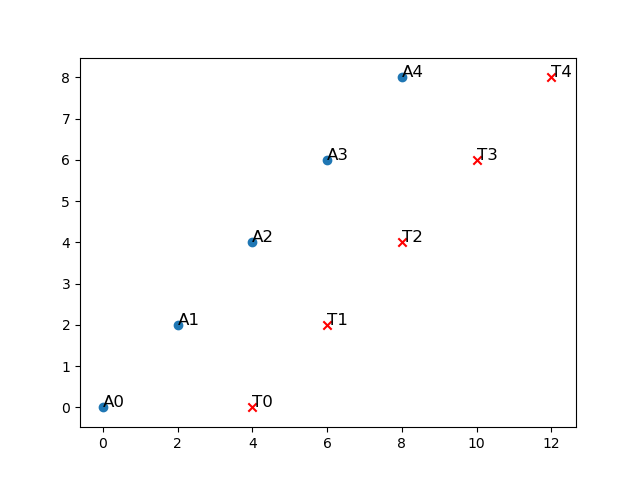

---------------------
optimization problem  (MIP):
1700 variables, 926 affine constraints

Z 	: list of 10 variables, (5, 5), binary
Safe_w3 	: list of 10 variables, (5, 5), binary
P 	: list of 10 variables, (5, 5), binary
Safe_w1 	: list of 10 variables, (5, 5), binary
Safe_w2 	: list of 10 variables, (5, 5), binary
agent yposition 	: (5, 10), continuous
Safe_w4 	: list of 10 variables, (5, 5), binary
agent yvelocity 	: (5, 10), continuous
agent xposition 	: (5, 10), continuous
agent xvelocity 	: (5, 10), continuous

	minimize 5.0*Z[0][0,0] + 5.0*Z[1][0,0] + 5.0*Z[2][0,0] + 5.0*Z[3][0,0] + 5.0*Z[4][0,0] + 5.0*Z[5][0,0] + 5.0*Z[6][0,0] + 5.0*Z[7][0,0] + 5.0*Z[8][0,0] + 5.0*Z[9][0,0] + 4.0*Z[0][0,1] + 4.0*Z[1][0,1] + 4.0*Z[2][0,1] + 4.0*Z[3][0,1] + 4.0*Z[4][0,1] + 4.0*Z[5][0,1] + 4.0*Z[6][0,1] + 4.0*Z[7][0,1] + 4.0*Z[8][0,1] + 4.0*Z[9][0,1] + 3.0*Z[0][0,2] + 3.0*Z[1][0,2] + 3.0*Z[2][0,2] + 3.0*Z[3][0,2] + 3.0*Z[4][0,2] + 3.0*Z[5][0,2] + 3.0*Z[6][0,2] + 3.0*Z[7][0,2] + 3.0*Z[8][0,2] + 3.

Gurobi instance created

Parameter MIPGap unchanged
   Value: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Changed value of parameter BarQCPConvTol to 1e-08
   Prev: 1e-06  Min: 0.0  Max: 1.0  Default: 1e-06
Parameter BarConvTol unchanged
   Value: 1e-08  Min: 0.0  Max: 1.0  Default: 1e-08
Changed value of parameter OptimalityTol to 1e-08
   Prev: 1e-06  Min: 1e-09  Max: 0.01  Default: 1e-06
Parameter QCPDual unchanged
   Value: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 926 rows, 1700 columns and 2620 nonzeros
Variable types: 200 continuous, 1500 integer (1500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-01, 1e+02]
Found heuristic solution: objective 16.0000000
Presolve removed 346 rows and 1205 columns
Presolve time: 0.01s
Presolved: 580 rows, 495 columns, 2140 nonzeros
Variable types: 150 continuous, 345 integer (345 binary)

Root relaxation: objective 5.000000e

In [8]:
#create a Problem instance (note that picos was imported at the top of this notebook)
prob = pic.Problem()

T = 10 # seconds, the time horizon of optimisation 

N = 5 # number of agents = number of tasks

R = np.ones((N,N)) # Matrix of resources needed for agent i task j allocation
R_max =  N * T #  maximum resources 

# The cost matrix assigning cost of task i going to agent j
# C = np.matrix('1 2 3 4 5;5 1 2 3 4;4 5 1 2 3;3 4 5 1 2;2 3 4 5 1')
C = np.matrix('5 4 3 2 1;1 5 4 3 2;2 1 5 4 3;3 2 1 4 5;4 3 2 1 5')



dt = 1 #seconds, the time step of optimisation 
#size of the storage for all the values of different signals
# in the opt horizon and per step time (needs to be integer)
ssize = int(T/dt) 

# allocation of agent j to ask i a matrix of binary variables
#[prob.add_variable('x[{0}]'.format(i),2) for i in range(4)]
Z = [prob.add_variable('Z[{0}]'.format(i), (N,N), vtype = 'binary') for i in range(T)]


# Z_0 = np.zeros((N,N))
# prob.add_constraint(Z[0] == Z_0)

# the position of all agents in a matrix if agent index and time index
X = prob.add_variable('agent xposition', (N,ssize))
Y = prob.add_variable('agent yposition', (N,ssize))

# the velocity of all agents in a matrix if agent index and time index
v_max = 10
v_min = -10
Vx = prob.add_variable('agent xvelocity', (N,ssize) )
Vy = prob.add_variable('agent yvelocity', (N,ssize) )

# the initial velocity of the agents
V_0 = np.zeros((2,N))

# the initial position of the agents
X_0 = np.matrix ('0 2 4 6 8;0 2 4 6 8')




# the destination of tasks
D = np.matrix ('19 15 10 1 17;5 3 2 8 1')

D = X_0 + 0 * np.random.randn(2, 5) + np.matrix('4, 4, 4, 4, 4;0,0,0,0,0')

D_safe = .5 # min safe distance between agents
D_task = .3 # min distance to engage with a task
M = 100 # arbitrary large number



fig1 = plt.figure()
plt.text(X_0[0,0], X_0[1,0], 'A0',fontsize=12)
plt.text(X_0[0,1], X_0[1,1], 'A1',fontsize=12)
plt.text(X_0[0,2], X_0[1,2], 'A2',fontsize=12)
plt.text(X_0[0,3], X_0[1,3], 'A3',fontsize=12)
plt.text(X_0[0,4], X_0[1,4], 'A4',fontsize=12)

plt.text(D[0,0], D[1,0], 'T0',fontsize=12)
plt.text(D[0,1], D[1,1], 'T1',fontsize=12)
plt.text(D[0,2], D[1,2], 'T2',fontsize=12)
plt.text(D[0,3], D[1,3], 'T3',fontsize=12)
plt.text(D[0,4], D[1,4], 'T4',fontsize=12)

# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('initial problem')
plt.scatter([X_0[0,:]],[X_0[1,:]], marker = 'o')
plt.scatter([D[0,:]],[D[1,:]], color = 'red', marker = 'x')
plt.show()


# the 4 variables per agent that enumerate the safety walls of a square around them 
Safe_w1 = [prob.add_variable('Safe_w1[{0}]'.format(i), (N,N),vtype = 'binary') for i in range(T)]
Safe_w2 = [prob.add_variable('Safe_w2[{0}]'.format(i), (N,N),vtype = 'binary') for i in range(T)]
Safe_w3 = [prob.add_variable('Safe_w3[{0}]'.format(i), (N,N),vtype = 'binary') for i in range(T)]
Safe_w4 = [prob.add_variable('Safe_w4[{0}]'.format(i), (N,N),vtype = 'binary') for i in range(T)]

# proximity flag of agent j to task i a matrix of binary variables
P = [prob.add_variable('P[{0}]'.format(i), (N,N),vtype = 'binary') for i in range(T)]


# prob.add_constraint(P[:,:,0] == Z_0)

for t in range (ssize):
   
 
    for j in range (N):
        
              
        for k in range (N):
            if (k <= j):
                continue
               
            # the agents should not collide by not crossing either of the 4 conditions
            prob.add_constraint(X[j, t] - X[k, t] > D_safe - M * Safe_w1[t][j,k])
            prob.add_constraint(X[k, t] - X[j, t] > D_safe - M * Safe_w2[t][j,k])
            prob.add_constraint(Y[j, t] - Y[k, t] > D_safe - M * Safe_w3[t][j,k])
            prob.add_constraint(Y[k, t] - Y[j, t] > D_safe - M * Safe_w4[t][j,k])
            
            # the above safety wall conditions may get relaxed but at least one should remain active
            prob.add_constraint(Safe_w1[t][j,k] + Safe_w2[t][j,k] + Safe_w3[t][j,k] + Safe_w4[t][j,k] < 3)
        
        if (t==ssize-1):
            for i in range (N):
            
                # the proximity flag p_ij agent j in range of task i 
                prob.add_constraint( X[j,t] - D[0,i] <  D_task + M*(1-P[t][i,j]))
                prob.add_constraint( Y[j,t] - D[1,i] <  D_task + M*(1-P[t][i,j]))
                prob.add_constraint( X[j,t] - D[0,i] > -D_task - M*(1-P[t][i,j]))
                prob.add_constraint( Y[j,t] - D[1,i] > -D_task - M*(1-P[t][i,j]))
            
                # agent j cannot pick task i if is not in proximity of it 
                prob.add_constraint( Z[t][i,j] - P[t][i,j]  < 0  )
            
            
for i in range (N):
        # at final time instance there should be only one agent assigned to task i    
        prob.add_constraint( sum(Z[-1][i,j] for j in range (N)) ==1 )             
        
for j in range (N):
        # at the final time instance there should be only one task assigned to agent j    
        prob.add_constraint( sum(Z[-1][i,j] for i in range (N)) ==1 )

#the initial position constrainst of the dynamics 
prob.add_constraint( X[:,0] == X_0[0,:])
prob.add_constraint( Y[:,0] == X_0[1,:])

#the initial velocity constrainst of the dynamics 
prob.add_constraint( Vx[:,0] == V_0[0,:])
prob.add_constraint( Vy[:,0] == V_0[1,:])
               
for t in range (ssize - 1):
    
    for j in range (N):
        
        
        # the dynamic relationshio of agent j 's position and velocity
        prob.add_constraint( X[j,t + 1] == X[j, t] + Vx[j, t])
        prob.add_constraint( Y[j,t + 1] == Y[j, t] + Vy[j, t])
        
        # the max min velocity constraints of the dynamics
        prob.add_constraint( Vx[j, t+1] < v_max)
        prob.add_constraint( Vx[j, t+1] > v_min)
        prob.add_constraint( Vy[j, t+1] < v_max)
        prob.add_constraint( Vy[j, t+1] > v_min)

        

# the overall resource constraints 
prob.add_constraint( sum(Z[t][i,j]*R[i,j] for i in range (N) for j in range (N) for t in range (ssize)) <  R_max)     
    

# The objective function 
obj_func = sum(Z[t][i,j]*C[i,j] for i in range (N) for j in range (N) for t in range (ssize))

prob.set_objective('min', obj_func)
print prob     
#prob.set_all_options_to_default()
prob.solve(solver='gurobi',verbose=1)
print 'allocation matrix at the end\n' , Z[-1].value
print 'proximity matrix at the end\n', P[-1].value
print 'positions of the agents at the end\n', X.value[:,-1],  Y.value[:,-1]
print 'positions of the tasks\n', D[0,:], '\n', D[1,:]                                                      


<IPython.core.display.Javascript object>


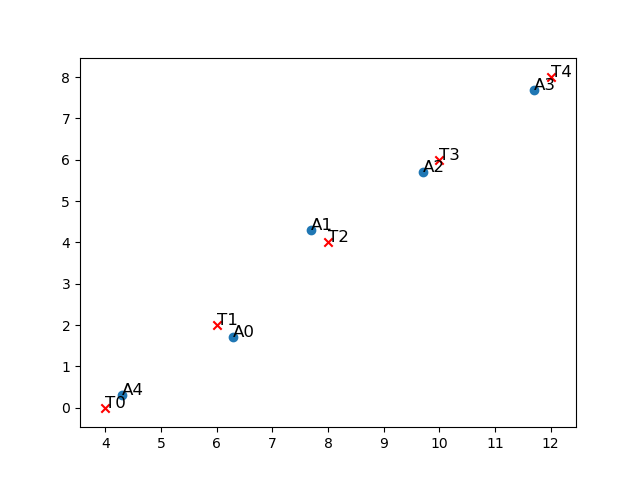

In [9]:

fig2 = plt.figure()
plt.text(X.value[0,-1], Y.value[0,-1], 'A0',fontsize=12)
plt.text(X.value[1,-1], Y.value[1,-1], 'A1',fontsize=12)
plt.text(X.value[2,-1], Y.value[2,-1], 'A2',fontsize=12)
plt.text(X.value[3,-1], Y.value[3,-1], 'A3',fontsize=12)
plt.text(X.value[4,-1], Y.value[4,-1], 'A4',fontsize=12)

plt.text(D[0,0], D[1,0], 'T0',fontsize=12)
plt.text(D[0,1], D[1,1], 'T1',fontsize=12)
plt.text(D[0,2], D[1,2], 'T2',fontsize=12)
plt.text(D[0,3], D[1,3], 'T3',fontsize=12)
plt.text(D[0,4], D[1,4], 'T4',fontsize=12)

# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('initial problem')
plt.scatter(np.transpose(X.value[:,-1]), np.transpose(Y.value[:,-1]), marker = 'o')
plt.scatter([D[0,:]],[D[1,:]], color = 'red', marker = 'x')
plt.show()


In [10]:
# # Animation 


# fig3 = plt.figure()

# ax = fig3.add_subplot(111, aspect='equal', autoscale_on=False,
#                      xlim=(-20, 20), ylim=(-20, 20))
# # particles holds the locations of the particles
# clr =['black','blue','green','orange','red']
# particles = plt.scatter([], [])

# def init():
#     """initialize animation"""
    
# #     particles.set_data([X_0[0,:]], [X_0[1,:]])
# #     plt.text(X_0[0,0], X_0[1,0], 'A0',fontsize=12)
# #     plt.text(X_0[0,1], X_0[1,1], 'A1',fontsize=12)
# #     plt.text(X_0[0,2], X_0[1,2], 'A2',fontsize=12)
# #     plt.text(X_0[0,3], X_0[1,3], 'A3',fontsize=12)
# #     plt.text(X_0[0,4], X_0[1,4], 'A4',fontsize=12)

#     plt.text(D[0,0], D[1,0], 'T0',fontsize=12)
#     plt.text(D[0,1], D[1,1], 'T1',fontsize=12)
#     plt.text(D[0,2], D[1,2], 'T2',fontsize=12)
#     plt.text(D[0,3], D[1,3], 'T3',fontsize=12)
#     plt.text(D[0,4], D[1,4], 'T4',fontsize=12)
    
#     plt.scatter([D[0,:]],[D[1,:]], color = ['black','blue','green','orange','red'], marker = 'x')
  

#     return particles,

# xdata = X.value
# ydata = Y.value


# def animate(i,xdata, ydata, particles):
#     """perform animation step"""
    
#     clr=['black','blue','green','orange','red']
#     particles.set_data([xdata[:,i]], [ydata[:,i]])

#     return particles,

# ani = animation.FuncAnimation(fig3, animate, frames=T, fargs=(xdata, ydata, particles),
#                               interval=1000, blit=True, init_func=init)

# plt.show()

# def update_line(num, data, line):
# #     line.set_data(data[..., :num])
#     line.set_data(data[:,num])
#     time_text.set_text('time = %.1f' % num)
#     home_text.set_text('h')
#     target_text.set_text('t')
    
#     return line, time_text, home_text, target_text

# fig3 = plt.figure()
# ax = fig3.add_subplot(111, aspect='equal', autoscale_on=False,
#                      xlim=(-10, 10), ylim=(-10, 10))
# ax.grid()
# time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
# home_text = ax.text(.75,.80, '', transform=ax.transAxes)
# target_text = ax.text(.15,.15, '', transform=ax.transAxes)

# data = x_sim

# l, = plt.plot( [], 'b-o', linewidth=4)
# # plt.xlim(-10, 10)
# # plt.ylim(-10, 10)
# plt.xlabel('x1')
# plt.ylabel('x2')
# plt.title('animation')

# line_ani = animation.FuncAnimation(fig3, update_line, size_Sim, fargs=(data, l),
#                                    interval=100, blit=True)